# Imports and loading data

In [4]:
from src.data_preprocessor import load_and_process_data, aggregate_to_yearly, load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [2]:
df = load_and_process_data()

2023-11-11 11:06:30,181 - INFO - Loading the latest recent file: data/lsoa-recent.csv
2023-11-11 11:06:30,563 - INFO - Loading the latest historical file: data/lsoa-historical.csv


# Boroughs with most violent crime

/tmp/ipykernel_5868/1343236266.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



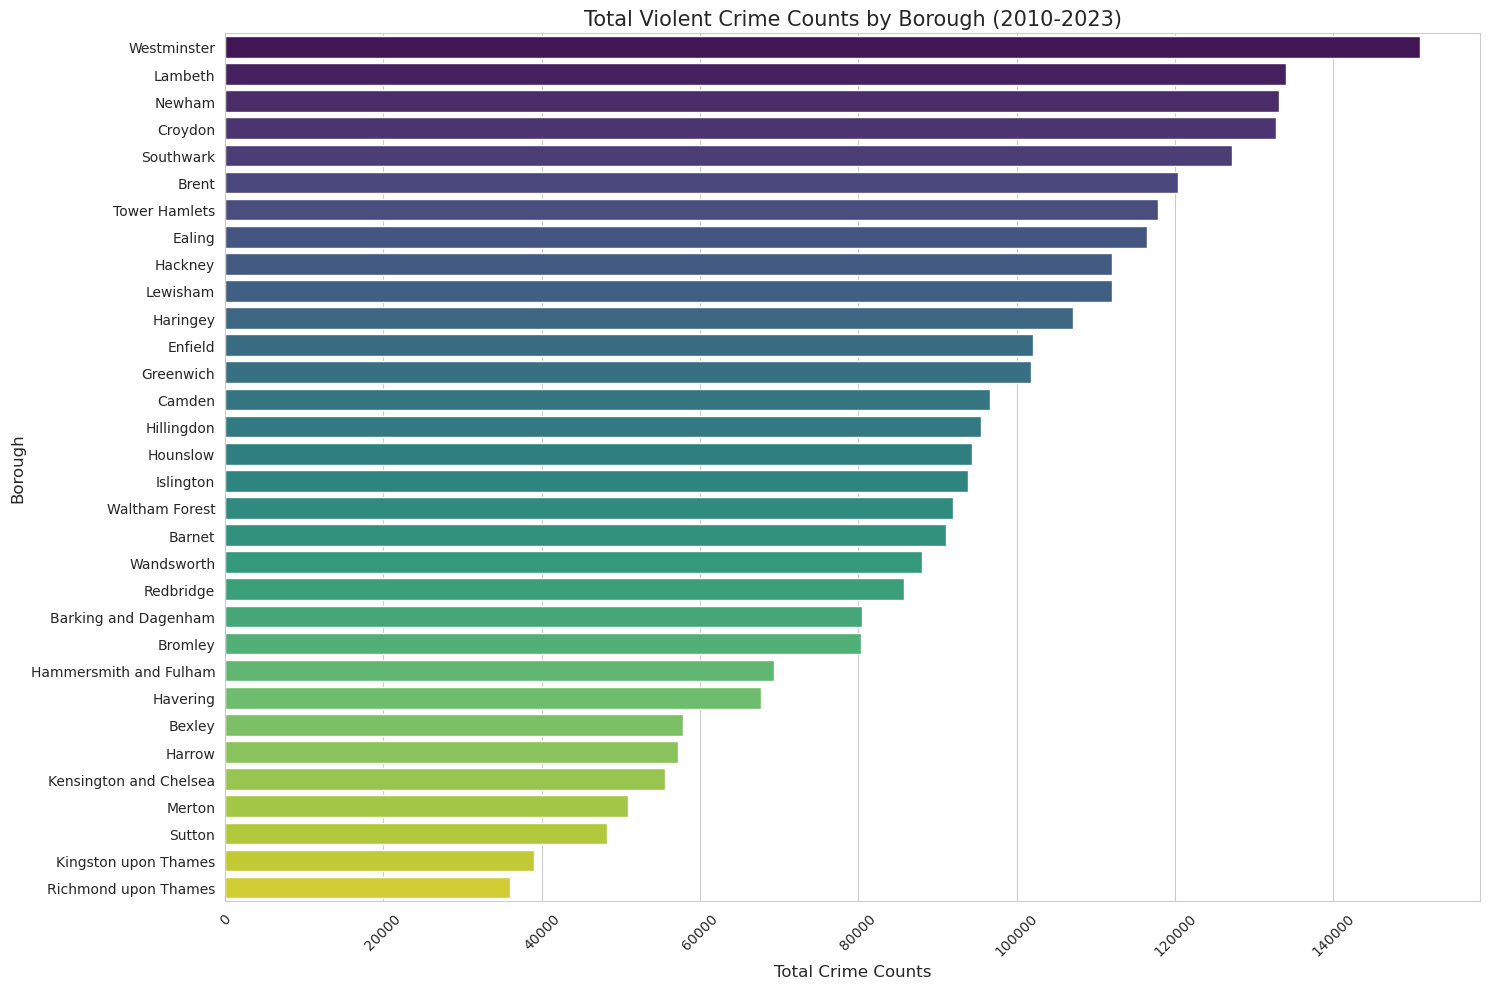

In [8]:

violent_crimes_data = df[df['Major Category'].isin([
    'Possession of Weapons', 'Robbery', 'Sexual Offences', 'Violence Against the Person'
])]


total_by_borough = violent_crimes_data.groupby('Borough').sum().sum(axis=1).sort_values(ascending=False)


sns.set_style("whitegrid")

# Bar Chart: Total violent crime counts by borough
plt.figure(figsize=(15, 10))
sns.barplot(y=total_by_borough.index, x=total_by_borough.values, palette="viridis")
plt.title('Total Violent Crime Counts by Borough (2010-2023)', fontsize=15)
plt.xlabel('Total Crime Counts', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:

def plot_crime_count_per_borough(df, category_col, categories):
    # Filter the DataFrame based on the categories provided
    filtered_data = df[df[category_col].isin(categories)]
    
    # Aggregate the total crimes by 'Borough'
    total_by_borough = filtered_data.groupby('Borough').sum().sum(axis=1).sort_values(ascending=False)
    
    # Create the Plotly bar chart
    fig = px.bar(total_by_borough, y=total_by_borough.index, x=total_by_borough.values,
                 orientation='h', title=f'Total Violent Crime Counts by Borough (2010-2023)',
                 labels={'y': 'Borough', 'x': 'Total Crime Counts'},
                 height=700,  # Adjust the height if needed
                 color=total_by_borough.values, color_continuous_scale='viridis')
    
    # Update the layout to sort the y-axis by the total in ascending order
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    
    # Display the figure
    fig.show()
    
# Usage

df = load_and_process_data()

categories_to_filter = ['Possession of Weapons', 'Robbery', 'Sexual Offences', 'Violence Against the Person']
plot_crime_count_per_borough(df, 'Major Category', categories_to_filter)

2023-11-11 11:08:03,238 - INFO - Loading the latest recent file: data/lsoa-recent.csv
2023-11-11 11:08:03,598 - INFO - Loading the latest historical file: data/lsoa-historical.csv
/tmp/ipykernel_5868/1731385339.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [5]:
# Extracting year from the columns and summing up the crimes for each year
yearly_totals = violent_crimes_data.drop(columns=['Major Category', 'Minor Category', 'Borough', 'LSOA Name', 'LSOA Code']).sum().reset_index()
yearly_totals['Year'] = yearly_totals['index'].str[:4]
yearly_sum = yearly_totals.groupby('Year').sum()

'''# Line Chart: Yearly trend of violent crimes for the entire city of London
plt.figure(figsize=(15, 6))
sns.lineplot(x=yearly_sum.index, y=yearly_sum[0], marker="o", color="b")
plt.title('Yearly Trend of Violent Crimes in London (2010-2023)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Counts', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()'''

fig = px.line(yearly_sum, x=yearly_sum.index, y=yearly_sum.columns[0],
              markers=True, title='Yearly Trend of Violent Crimes in London (2010-2023)',
              labels={'x': 'Year', 'y': 'Total Crime Counts'})

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Total Crime Counts',
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightPink'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightBlue'),
                  plot_bgcolor='white')

fig.show()


/tmp/ipykernel_6482/4022458213.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [30]:
yearly_totals

,index,0,Year
0,201903,22370.0,2019
1,201904,21099.0,2019
2,201905,22389.0,2019
3,201906,22401.0,2019
4,201907,23867.0,2019
...,...,...,...
157,202305,24725.0,2023
158,202306,25937.0,2023
159,202307,25374.0,2023
160,202308,23659.0,2023


In [24]:
# Extracting year and month from the columns and summing up the crimes for each month
monthly_totals = violent_crimes_data.drop(columns=['Major Category', 'Minor Category', 'Borough', 'LSOA Name', 'LSOA Code']).sum().reset_index()
monthly_totals['Year'] = monthly_totals['index'].str[:4]
monthly_totals['Month'] = monthly_totals['index'].str[4:] 
monthly_pivot = monthly_totals.pivot("Month", "Year", 0)

'''# Heatmap: Monthly distribution of violent crimes in the recent years for the entire city of London
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_pivot, cmap="YlGnBu", linewidths=.5)
plt.title('Monthly Distribution of Violent Crimes in London (2010-2023)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()
'''


fig = px.imshow(monthly_pivot,
                labels=dict(x="Year", y="Month", color="Total Crime Counts"),
                x=monthly_pivot.columns,
                y=monthly_pivot.index,
                title='Monthly Distribution of Violent Crimes in London (2010-2023)',
                color_continuous_scale='YlGnBu')  # Yellow to Green to Blue color scale

fig.update_xaxes(side="bottom")
fig.update_layout(
    xaxis_nticks=36,
    width=1000,  # Set the width of the figure
    height=800   # Set the height of the figure
)
fig.show()

# YlGnBu

/tmp/ipykernel_6482/2509239281.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



# Spatial plots

In [7]:
# Load the shapefile
london_boroughs = gpd.read_file("/home/adilsaid/Documents/Data analysis projects/Github repos/london-crime/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

# Display the first few rows of the shapefile
london_boroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [8]:
# Summing up violent crime counts by borough and year
borough_yearly_totals = violent_crimes_data.groupby(['Borough']).sum().T
borough_yearly_totals['Year'] = borough_yearly_totals.index.str[:4]
borough_yearly_totals = borough_yearly_totals.groupby('Year').sum()

# Preparing data for merging with the shapefile
merged_data = london_boroughs.set_index('NAME').join(borough_yearly_totals.transpose())

merged_data.head()

/tmp/ipykernel_6482/3099397991.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
NAME,,,,,,,,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",1772.0,2302.0,2195.0,...,2112.0,2640.0,2768.0,3121.0,3504.0,3754.0,3458.0,3491.0,3506.0,2490.0
Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",5672.0,7935.0,7939.0,...,8230.0,9262.0,10046.0,10161.0,10514.0,11066.0,11640.0,11966.0,12361.0,8703.0
Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",3553.0,4690.0,4191.0,...,4972.0,5742.0,5828.0,6713.0,6579.0,7142.0,6960.0,7015.0,7344.0,5407.0
Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",4173.0,5383.0,5444.0,...,5466.0,6373.0,6607.0,7234.0,8014.0,8531.0,8395.0,8500.0,8765.0,6583.0
Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",6158.0,7600.0,7218.0,...,6954.0,8136.0,8627.0,8933.0,9106.0,9897.0,9586.0,9943.0,10280.0,7786.0


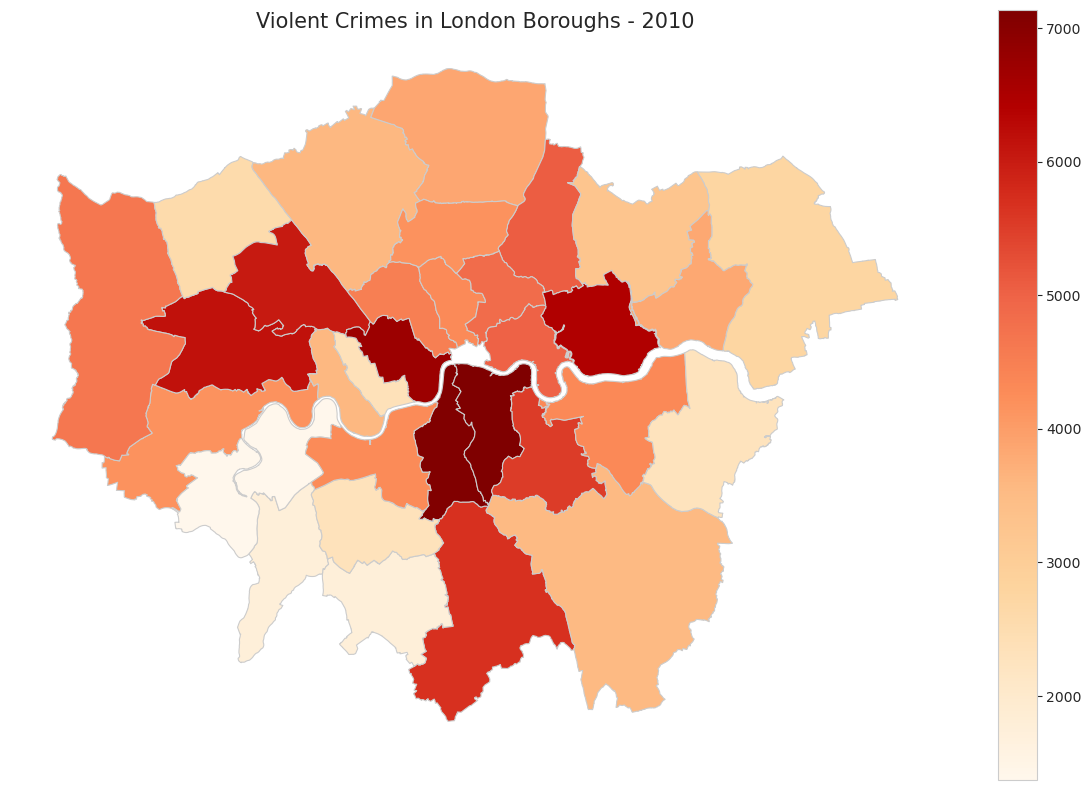

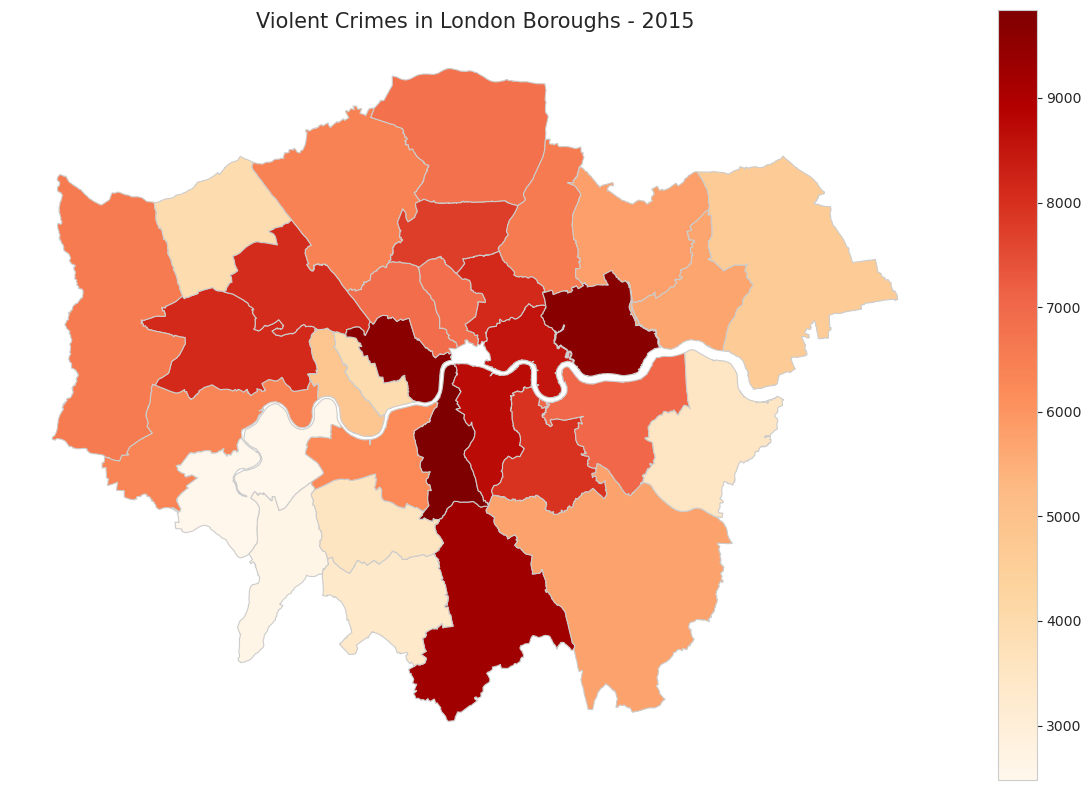

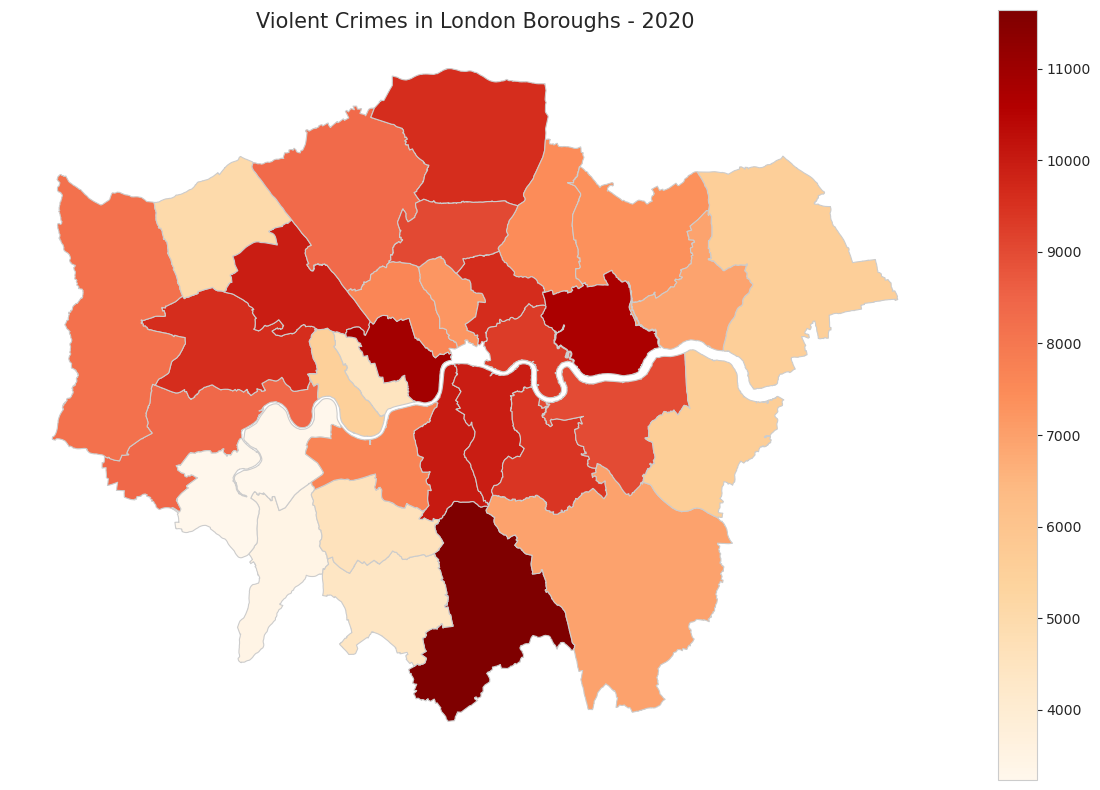

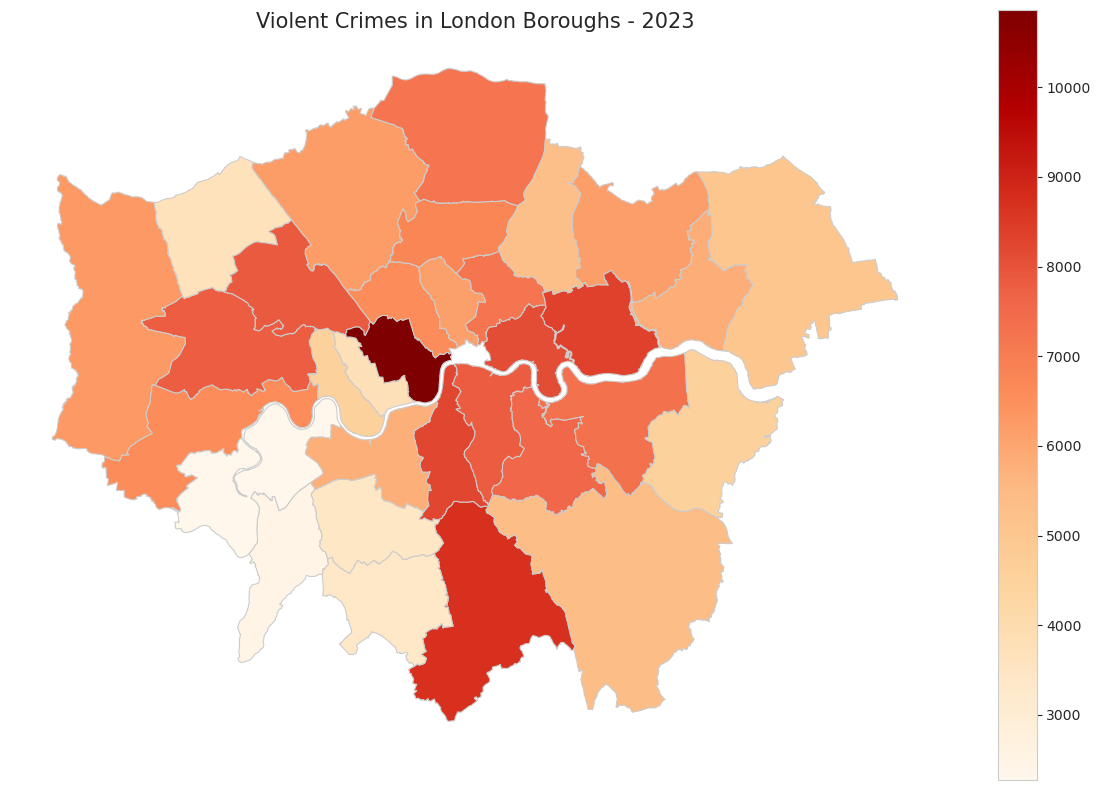

In [11]:
# Define a function to plot heatmaps for each year
def plot_yearly_heatmap(year):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Violent Crimes in London Boroughs - {year}', fontsize=15)
    plt.axis('off')
    plt.show()

# Display heatmaps for a few representative years
representative_years = ['2010', '2015', '2020', '2023']
for year in representative_years:
    plot_yearly_heatmap(year)